# DH140 Midterm: Global Music Trends
by Pawan (Sine) Polcharoen and Claire Guo

## Introduction + Research Question
In this notebook, we will be exploring and analyzing global Spotify data of Top Songs from May 2020 and June 2019. In conjunction, we will we also be exploring global GDP data in an effort to answer our research question:

**What are the characteristics of top songs across the world and why? Do outside factors, such as economic standing, affect music taste globally?**

Through a series of charts and map visualizations, we hope to gain a deeper understanding of our data sets and what information they present.

## Data Sources
First, we are importing all the libraries we will need for this exploration. 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

Our project will utilize four main data sets, which will be combined for deeper analysis. The first two data sets are Spotify Top Song data sets from May 2020 and June 2019. These files contain top songs for their respective months by Country, and also contain characteristic levels for each song, such as danceability, energy, loudness, etc. Our next data set is a world data set containing ISO tags and geometric qualities for mapping. This file will be joined with the Spotify and GDP data to create maps. Finally, our last data set contains GDP values per various Countries in 2019. We will utlize this file to analyze the correlation between economic standing and music taste.

Using `pandas` and `geopandas` libraries, we can import our data sets into the notebook.

In [2]:
may = pd.read_csv('data/spotify_may2020.csv')
june = pd.read_csv('data/spotify_june2019.csv')
world = gpd.read_file('data/world.geojson')
gdp = pd.read_csv('data/worldgdp.csv')

Now that our data is loaded in, we can begin the preliminary exploration.

## Data Exploration
In this section, we will be looking at the structure of our data sets and what they contain, as well as joining the world data set with the other three.

### May 2020 Spotify Data
Starting off with the May 2020 Spotify Data, we will use the `shape` command to get the dimensions of the data frame.

In [19]:
may.shape

(2572, 29)

The May data has 29 columns and 2572 observations.

Next, we will use `info` to reveal more information about our data set.

In [20]:
may.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2572 entries, 0 to 2571
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           2572 non-null   object 
 1   Continent         2572 non-null   object 
 2   Rank              2572 non-null   int64  
 3   Title             2572 non-null   object 
 4   Artists           2572 non-null   object 
 5   Album             2572 non-null   object 
 6   Explicit          2572 non-null   int64  
 7   Duration          2572 non-null   object 
 8   danceability      2572 non-null   float64
 9   energy            2572 non-null   float64
 10  key               2572 non-null   int64  
 11  loudness          2572 non-null   float64
 12  mode              2572 non-null   int64  
 13  speechiness       2572 non-null   float64
 14  acousticness      2572 non-null   float64
 15  instrumentalness  2572 non-null   float64
 16  liveness          2572 non-null   float64


The output above shows us all the column names, count, null values, and data types within the data set.

To better understand the structure of the May data, we use the `head` command.

In [21]:
may.head()

Country Continent  Rank                            Title  \
0  Global    Global     1  Rain On Me (with Ariana Grande)   
1  Global    Global     2                  Blinding Lights   
2  Global    Global     2                  Blinding Lights   
3  Global    Global     3     ROCKSTAR (feat. Roddy Ricch)   
4  Global    Global     3     ROCKSTAR (feat. Roddy Ricch)   

                    Artists                            Album  Explicit  \
0  Lady Gaga, Ariana Grande  Rain On Me (with Ariana Grande)         0   
1                The Weeknd                      After Hours         0   
2                The Weeknd                      After Hours         0   
3       DaBaby, Roddy Ricch                 BLAME IT ON BABY         1   
4       DaBaby, Roddy Ricch                 BLAME IT ON BABY         1   

  Duration  danceability  energy  ...            type                      id  \
0     3:02         0.672   0.855  ...  audio_features  24ySl2hOPGCDcxBxFIqWBu   
1     3:20         0.518   0.727  ...  audio_features  5Sg09MvHqNWPWsYeuY2toY   
2     3:20         0.513   0.796  ...  audio_features  0sf12qNH5qcw8qpgymFOqD   
3     3:01         0.746   0.690  ...  audio_features  7ytR5pFWmSjzHJIeQkgog4   
4     3:01         0.746   0.690  ...  audio_features  7ytR5pFWmSjzHJIeQkgog4   

                                    uri  \
0  spotify:track:24ySl2hOPGCDcxBxFIqWBu   
1  spotify:track:5Sg09MvHqNWPWsYeuY2toY   
2  spotify:track:0sf12qNH5qcw8qpgymFOqD   
3  spotify:track:7ytR5pFWmSjzHJIeQkgog4   
4  spotify:track:7ytR5pFWmSjzHJIeQkgog4   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/24ySl2hOPGCD...   
1  https://api.spotify.com/v1/tracks/5Sg09MvHqNWP...   
2  https://api.spotify.com/v1/tracks/0sf12qNH5qcw...   
3  https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...   
4  https://api.spotify.com/v1/tracks/7ytR5pFWmSjz...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/24yS...       182200   
1  https://api.spotify.com/v1/audio-analysis/5Sg0...       200046   
2  https://api.spotify.com/v1/audio-analysis/0sf1...       201573   
3  https://api.spotify.com/v1/audio-analysis/7ytR...       181733   
4  https://api.spotify.com/v1/audio-analysis/7ytR...       181733   

   time_signature            genre  Unnamed..0 title  
0               4              Pop         NaN   NaN  
1               4              RnB         NaN   NaN  
2               4              Pop         NaN   NaN  
3               4  Underground Rap         NaN   NaN  
4               4              Rap         NaN   NaN  

[5 rows x 29 columns]

The output above shows the first five rows of the data set. Through this, we are able to see that the data set contains Global data in addition to data separated by Country. Since these points could potentially skew the data in later analysis, we must remove these rows.

In [3]:
# remove 'Global' rows
may = may[may.Country != 'Global']
may.head()

Country      Continent  Rank            Title               Artists  \
81  Argentina  South America     9           Tattoo        Rauw Alejandro   
82  Argentina  South America     9           Tattoo        Rauw Alejandro   
83  Argentina  South America    11             Tusa  KAROL G, Nicki Minaj   
84  Argentina  South America    19  Blinding Lights            The Weeknd   
85  Argentina  South America    19  Blinding Lights            The Weeknd   

          Album  Explicit Duration  danceability  energy  ...            type  \
81       Tattoo         0     3:22         0.566   0.766  ...  audio_features   
82       Tattoo         0     3:22         0.566   0.766  ...  audio_features   
83         Tusa         0     3:20         0.803   0.715  ...  audio_features   
84  After Hours         0     3:20         0.518   0.727  ...  audio_features   
85  After Hours         0     3:20         0.513   0.796  ...  audio_features   

                        id                                   uri  \
81  1oi3vkeOGXAd3qljM5o9Oe  spotify:track:1oi3vkeOGXAd3qljM5o9Oe   
82  3Ui2jdyxbZQrZohfM0NOgG  spotify:track:3Ui2jdyxbZQrZohfM0NOgG   
83  7k4t7uLgtOxPwTpFmtJNTY  spotify:track:7k4t7uLgtOxPwTpFmtJNTY   
84  5Sg09MvHqNWPWsYeuY2toY  spotify:track:5Sg09MvHqNWPWsYeuY2toY   
85  0sf12qNH5qcw8qpgymFOqD  spotify:track:0sf12qNH5qcw8qpgymFOqD   

                                           track_href  \
81  https://api.spotify.com/v1/tracks/1oi3vkeOGXAd...   
82  https://api.spotify.com/v1/tracks/3Ui2jdyxbZQr...   
83  https://api.spotify.com/v1/tracks/7k4t7uLgtOxP...   
84  https://api.spotify.com/v1/tracks/5Sg09MvHqNWP...   
85  https://api.spotify.com/v1/tracks/0sf12qNH5qcw...   

                                         analysis_url  duration_ms  \
81  https://api.spotify.com/v1/audio-analysis/1oi3...       233467   
82  https://api.spotify.com/v1/audio-analysis/3Ui2...       233467   
83  https://api.spotify.com/v1/audio-analysis/7k4t...       200960   
84  https://api.spotify.com/v1/audio-analysis/5Sg0...       200046   
85  https://api.spotify.com/v1/audio-analysis/0sf1...       201573   

    time_signature  genre  Unnamed..0 title  
81               4    RnB         NaN   NaN  
82               4    RnB         NaN   NaN  
83               4    Pop         NaN   NaN  
84               4    RnB         NaN   NaN  
85               4    Pop         NaN   NaN  

[5 rows x 29 columns]

As shown in the output from the `head` command, the Global rows have successfully been removed.

Next, we are going to subset the data to only contain the columns that we are interested in exploring. These include the geographic elements, song titles and rank, and the song characteristics.

In [16]:
## subset it
columns_to_keep = ['Country',
 'Continent',
 'Rank',
 'Title',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'genre']
may = may[columns_to_keep]
may.head()

Country      Continent  Rank            Title  danceability  energy  \
81  Argentina  South America     9           Tattoo         0.566   0.766   
82  Argentina  South America     9           Tattoo         0.566   0.766   
83  Argentina  South America    11             Tusa         0.803   0.715   
84  Argentina  South America    19  Blinding Lights         0.518   0.727   
85  Argentina  South America    19  Blinding Lights         0.513   0.796   
86  Argentina  South America    21     Dance Monkey         0.825   0.593   

    key  loudness  mode  speechiness  acousticness  instrumentalness  \
81    2    -5.036     1       0.0399       0.43100          0.000000   
82    2    -5.036     1       0.0399       0.43100          0.000000   
83    2    -3.280     1       0.2980       0.29500          0.000134   
84    1    -5.947     1       0.0557       0.00153          0.000152   
85    1    -4.075     1       0.0629       0.00147          0.000209   
86    6    -6.401     0       0.0988       0.68800          0.000161   

    liveness  valence genre  
81    0.1010    0.547   RnB  
82    0.1010    0.547   RnB  
83    0.0574    0.574   Pop  
84    0.0882    0.342   RnB  
85    0.0938    0.345   Pop  
86    0.1700    0.540   Pop

The `head` command output above shows the final subsetted May 2020 data set. 

### June 2019 Spotify Data
Moving on to the June 2019 Spotify data, we will again use the `shape` command to get the dimensions of the data frame.

In [24]:
june.shape

(208352, 28)

The June data has 28 columns and 208352 observations. It is much larger than the May data set.

Next, we will use `info` to reveal more information about our data set.

In [25]:
june.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208352 entries, 0 to 208351
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              208352 non-null  object 
 1   Position          208352 non-null  int64  
 2   Artist            208352 non-null  object 
 3   Streams           208352 non-null  int64  
 4   Country           208352 non-null  object 
 5   Date2             208352 non-null  object 
 6   Title             208352 non-null  object 
 7   danceability      208352 non-null  float64
 8   energy            208352 non-null  float64
 9   key               208352 non-null  int64  
 10  loudness          208352 non-null  float64
 11  mode              208352 non-null  int64  
 12  speechiness       208352 non-null  float64
 13  acousticness      208352 non-null  float64
 14  instrumentalness  208352 non-null  float64
 15  liveness          208352 non-null  float64
 16  valence           20

The output above shows us all the column names, count, null values, and data types within the data set.

To better understand the structure of the June data, we use the `head` command.

In [26]:
june.head()

Date  Position         Artist  Streams    Country       Date2  \
0  2019-06-07         1         Avicii   412907     Sweden  2019-06-07   
1  2019-06-07         1         Avicii   412907     Sweden  2019-06-07   
2  2019-06-08         1  Billie Eilish   245264  Australia  2019-06-08   
3  2019-06-02         1  Billie Eilish     4788     Latvia  2019-06-02   
4  2019-06-04         1  Billie Eilish     5681    Estonia  2019-06-04   

     Title  danceability  energy  key  ...            type  \
0   Heaven         0.748   0.258    7  ...  audio_features   
1   Heaven         0.519   0.955    1  ...  audio_features   
2  bad guy         0.701   0.425    7  ...  audio_features   
3  bad guy         0.701   0.425    7  ...  audio_features   
4  bad guy         0.701   0.425    7  ...  audio_features   

                       id                                   uri  \
0  7e9QE1vqclPjl0TEs2uxv6  spotify:track:7e9QE1vqclPjl0TEs2uxv6   
1  1DmLlPEKT79nAXC8J1mXfC  spotify:track:1DmLlPEKT79nAXC8J1mXfC   
2  2Fxmhks0bxGSBdJ92vM42m  spotify:track:2Fxmhks0bxGSBdJ92vM42m   
3  2Fxmhks0bxGSBdJ92vM42m  spotify:track:2Fxmhks0bxGSBdJ92vM42m   
4  2Fxmhks0bxGSBdJ92vM42m  spotify:track:2Fxmhks0bxGSBdJ92vM42m   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/7e9QE1vqclPj...   
1  https://api.spotify.com/v1/tracks/1DmLlPEKT79n...   
2  https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...   
3  https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...   
4  https://api.spotify.com/v1/tracks/2Fxmhks0bxGS...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/7e9Q...       112927   
1  https://api.spotify.com/v1/audio-analysis/1DmL...       215760   
2  https://api.spotify.com/v1/audio-analysis/2Fxm...       194088   
3  https://api.spotify.com/v1/audio-analysis/2Fxm...       194088   
4  https://api.spotify.com/v1/audio-analysis/2Fxm...       194088   

   time_signature            genre Unnamed..0 title  
0               4  Underground Rap        NaN   NaN  
1               4              RnB        NaN   NaN  
2               4              Pop        NaN   NaN  
3               4              Pop        NaN   NaN  
4               4              Pop        NaN   NaN  

[5 rows x 28 columns]

The output above shows the first five rows of the data set. Although it does not show any rows with Global data, we still want to remove any in case they are hidden in the large data set.

In [6]:
# remove 'Global' rows
june = june[june.Country != 'Global']
june.shape

(201362, 28)

As shown in the output from the `shape` command, we can see that the number of observations has decreased, indicating that we successfully removed any Global rows.

Next, we are going to subset the data to only contain the columns that we are interested in exploring. These include the geographic elements, song titles and rank, and the song characteristics.

In [15]:
## subset it
columns_to_keep2 = ['Date',
 'Position',
 'Country',
 'Title',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'genre']
june = june[columns_to_keep2]
june.head(10)

Date  Position    Country    Title  danceability  energy  key  \
0  2019-06-07         1     Sweden   Heaven         0.748   0.258    7   
1  2019-06-07         1     Sweden   Heaven         0.519   0.955    1   
2  2019-06-08         1  Australia  bad guy         0.701   0.425    7   
3  2019-06-02         1     Latvia  bad guy         0.701   0.425    7   
4  2019-06-04         1    Estonia  bad guy         0.701   0.425    7   
5  2019-06-18         1    Iceland  bad guy         0.701   0.425    7   
6  2019-06-04         1    Iceland  bad guy         0.701   0.425    7   
7  2019-06-03         1     Poland  bad guy         0.701   0.425    7   
8  2019-06-06         1     Poland  bad guy         0.701   0.425    7   
9  2019-06-03         1    Hungary  bad guy         0.701   0.425    7   

   loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0    -7.667     1       0.0664         0.188              0.00    0.0905   
1    -5.746     1       0.4360         0.249              0.00    0.1300   
2   -10.965     1       0.3750         0.328              0.13    0.1000   
3   -10.965     1       0.3750         0.328              0.13    0.1000   
4   -10.965     1       0.3750         0.328              0.13    0.1000   
5   -10.965     1       0.3750         0.328              0.13    0.1000   
6   -10.965     1       0.3750         0.328              0.13    0.1000   
7   -10.965     1       0.3750         0.328              0.13    0.1000   
8   -10.965     1       0.3750         0.328              0.13    0.1000   
9   -10.965     1       0.3750         0.328              0.13    0.1000   

   valence    tempo            genre  
0    0.138  138.193  Underground Rap  
1    0.625  164.480              RnB  
2    0.562  135.128              Pop  
3    0.562  135.128              Pop  
4    0.562  135.128              Pop  
5    0.562  135.128              Pop  
6    0.562  135.128              Pop  
7    0.562  135.128              Pop  
8    0.562  135.128              Pop  
9    0.562  135.128              Pop

The `head` command output above shows the final subsetted June 2019 data set. 

### World Data
Now that we have successfully subsetted our Spotify data, we can move focus to the World data. Starting off, again, with the `shape` command to get the dimensions of the data frame.

In [29]:
world.shape

(249, 6)

The world data has 6 columns and 249 observations.

Next, we will use `info` to reveal more information about our data set.

In [30]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   FID         249 non-null    int64   
 1   COUNTRY     249 non-null    object  
 2   ISO         249 non-null    object  
 3   COUNTRYAFF  249 non-null    object  
 4   AFF_ISO     249 non-null    object  
 5   geometry    249 non-null    geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 11.8+ KB


The output above shows us all the column names, count, null values, and data types within the data set.

To better understand the structure of the data, we use the `head` command.

In [31]:
world.head()

FID                               COUNTRY ISO     COUNTRYAFF AFF_ISO  \
0    1                        American Samoa  AS  United States      US   
1    2  United States Minor Outlying Islands  UM  United States      US   
2    3                          Cook Islands  CK    New Zealand      NZ   
3    4                      French Polynesia  PF         France      FR   
4    5                                  Niue  NU    New Zealand      NZ   

                                            geometry  
0  POLYGON ((-170.74390 -14.37555, -170.74942 -14...  
1  MULTIPOLYGON (((-160.02114 -0.39805, -160.0281...  
2  MULTIPOLYGON (((-159.74698 -21.25667, -159.793...  
3  MULTIPOLYGON (((-149.17920 -17.87084, -149.258...  
4  POLYGON ((-169.89389 -19.14556, -169.93088 -19...

The output above shows the first five rows of the data set. 

Since this data set has no Global rows, we do not have to remove them. Furthermore, we want to keep all the columns in the data set, so there is no subsetting necessary. However, since we plan to join this data with our Spotify and GDP data, we have to rename the 'COUNTRY' column to 'Country' to match the other data sets.

In [17]:
# current columns as a list
world.columns.to_list()

# rename
world.columns = ['FID', 'Country', 'ISO', 'COUNTRYAFF', 'AFF_ISO', 'geometry']
world.head(6)

FID                               Country ISO      COUNTRYAFF AFF_ISO  \
0    1                        American Samoa  AS   United States      US   
1    2  United States Minor Outlying Islands  UM   United States      US   
2    3                          Cook Islands  CK     New Zealand      NZ   
3    4                      French Polynesia  PF          France      FR   
4    5                                  Niue  NU     New Zealand      NZ   
5    6                              Pitcairn  PN  United Kingdom      GB   

                                            geometry  
0  POLYGON ((-170.74390 -14.37555, -170.74942 -14...  
1  MULTIPOLYGON (((-160.02114 -0.39805, -160.0281...  
2  MULTIPOLYGON (((-159.74698 -21.25667, -159.793...  
3  MULTIPOLYGON (((-149.17920 -17.87084, -149.258...  
4  POLYGON ((-169.89389 -19.14556, -169.93088 -19...  
5  MULTIPOLYGON (((-128.33222 -24.32726, -128.326...

The `head` command output above shows the final renamed world data set. 

#### Joining with Spotify Data
With our subsetted Spotify data and renamed world data, we can use `join` to combine the two by the column 'Country', starting off with the May data set. In addition to joining the data sets, we also use the command `dropna` to remove any rows null values that are created during the joining process.

In [8]:
mdf = world.set_index('Country').join(may.set_index('Country')) # join
mdf = mdf.dropna(how='any',axis=0) # drop rows with null values
mdf.head()

FID ISO COUNTRYAFF AFF_ISO  \
Country                                 
Argentina   15  AR  Argentina      AR   
Argentina   15  AR  Argentina      AR   
Argentina   15  AR  Argentina      AR   
Argentina   15  AR  Argentina      AR   
Argentina   15  AR  Argentina      AR   

                                                    geometry      Continent  \
Country                                                                       
Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...  South America   
Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...  South America   
Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...  South America   
Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...  South America   
Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...  South America   

           Rank            Title  danceability  energy  key  loudness  mode  \
Country                                                                       
Argentina   9.0           Tattoo         0.566   0.766  2.0    -5.036   1.0   
Argentina   9.0           Tattoo         0.566   0.766  2.0    -5.036   1.0   
Argentina  11.0             Tusa         0.803   0.715  2.0    -3.280   1.0   
Argentina  19.0  Blinding Lights         0.518   0.727  1.0    -5.947   1.0   
Argentina  19.0  Blinding Lights         0.513   0.796  1.0    -4.075   1.0   

           speechiness  acousticness  instrumentalness  liveness  valence  \
Country                                                                     
Argentina       0.0399       0.43100          0.000000    0.1010    0.547   
Argentina       0.0399       0.43100          0.000000    0.1010    0.547   
Argentina       0.2980       0.29500          0.000134    0.0574    0.574   
Argentina       0.0557       0.00153          0.000152    0.0882    0.342   
Argentina       0.0629       0.00147          0.000209    0.0938    0.345   

          genre  
Country          
Argentina   RnB  
Argentina   RnB  
Argentina   Pop  
Argentina   RnB  
Argentina   Pop

As shown in the `head` command output, the new data frame `mdf` contains columns from the world data set and the Spotify May 2020 data set, joined by the column 'Country'.

Next, we can do the same with the June 2019 data.

In [34]:
jdf = world.set_index('Country').join(june.set_index('Country'))
jdf = jdf.dropna(how='any',axis=0) 
jdf.head()

FID ISO COUNTRYAFF AFF_ISO  \
Country                                 
Argentina   15  AR  Argentina      AR   
Argentina   15  AR  Argentina      AR   
Argentina   15  AR  Argentina      AR   
Argentina   15  AR  Argentina      AR   
Argentina   15  AR  Argentina      AR   

                                                    geometry        Date  \
Country                                                                    
Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...  2019-06-17   
Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...  2019-06-13   
Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...  2019-06-03   
Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...  2019-06-03   
Argentina  MULTIPOLYGON (((-71.85916 -41.01128, -71.83806...  2019-06-20   

           Position                                Title  danceability  \
Country                                                                  
Argentina     100.0  Bohemian Rhapsody - Remastered 2011         0.414   
Argentina     107.0  Bohemian Rhapsody - Remastered 2011         0.414   
Argentina     105.0                        Old Town Road         0.907   
Argentina     105.0                        Old Town Road         0.907   
Argentina     111.0  Bohemian Rhapsody - Remastered 2011         0.414   

           energy  key  loudness  mode  speechiness  acousticness  \
Country                                                             
Argentina   0.404  0.0    -9.928   0.0       0.0499        0.2710   
Argentina   0.404  0.0    -9.928   0.0       0.0499        0.2710   
Argentina   0.530  1.0    -6.112   1.0       0.1270        0.0578   
Argentina   0.530  1.0    -6.112   1.0       0.1270        0.0578   
Argentina   0.404  0.0    -9.928   0.0       0.0499        0.2710   

           instrumentalness  liveness  valence    tempo   genre  
Country                                                          
Argentina          0.000000     0.300    0.224  142.210     Emo  
Argentina          0.000000     0.300    0.224  142.210     Emo  
Argentina          0.000002     0.101    0.507  135.998     Emo  
Argentina          0.000002     0.101    0.507  135.998  Hiphop  
Argentina          0.000000     0.300    0.224  142.210     Emo

As shown in the `head` command output, the new data frame `jdf` contains columns from the world data set and the Spotify June 2019 data set, joined by the column 'Country'.

### GDP 2019 Data
Finally, we can look as the GDP data set, again using the `shape` command to get the dimensions of the data frame.

In [35]:
gdp.shape

(264, 5)

The world data has 5 columns and 264 observations.

Next, we will use `info` to reveal more information about our data set.

In [36]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   2019            230 non-null    float64
dtypes: float64(1), object(4)
memory usage: 10.4+ KB


The output above shows us all the column names, count, null values, and data types within the data set.

To better understand the structure of the data, we use the `head` command.

In [37]:
gdp.head()

Country Name Country Code     Indicator Name  Indicator Code          2019
0        Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD           NaN
1  Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD  1.929110e+10
2       Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD  8.881570e+10
3      Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD  1.527918e+10
4      Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD  3.154058e+09

The output above shows the first five rows of the data set. 

Since this data set has no Global rows, we do not have to remove them. Instead, we will subset the data to only include the columns we want: 'Country Name', 'Country Code', and '2019', which contains the GDP values.

In [18]:
## subset it
columns_to_keep2 = ['Country Name', 'Country Code', '2019']
gdp = gdp[columns_to_keep2]
gdp.head()

Country Name Country Code          2019
0        Aruba          ABW           NaN
1  Afghanistan          AFG  1.929110e+10
2       Angola          AGO  8.881570e+10
3      Albania          ALB  1.527918e+10
4      Andorra          AND  3.154058e+09

The output above shows that we successfully subsetted the data set.

Since we plan to join this data with our world data, we have to rename the 'Country Name' column to 'Country' to match the other data set.

In [20]:
# current columns as a list
gdp.columns.to_list()

# rename
gdp.columns = ['Country', 'Country Code', 'GDP']
gdp.head(6)

Country Country Code           GDP
0        Aruba          ABW           NaN
1  Afghanistan          AFG  1.929110e+10
2       Angola          AGO  8.881570e+10
3      Albania          ALB  1.527918e+10
4      Andorra          AND  3.154058e+09
5   Arab World          ARB  2.817410e+12

The `head` command output above shows the final renamed and subsetted GDP 2019 data set. 

#### Joining with World Data

With the same `join` and `dropna` commands used before, we can now combine the world and GDP data sets by the column 'Country'.

In [40]:
gdf = world.set_index('Country').join(gdp.set_index('Country'))
gdf = gdf.dropna(how='any',axis=0) 
gdf.head()

FID ISO   COUNTRYAFF AFF_ISO  \
Country                                     
Samoa          7  WS        Samoa      WS   
Tonga          9  TO        Tonga      TO   
El Salvador   11  SV  El Salvador      SV   
Guatemala     12  GT    Guatemala      GT   
Mexico        13  MX       Mexico      MX   

                                                      geometry Country Code  \
Country                                                                       
Samoa        MULTIPOLYGON (((-172.59650 -13.50911, -172.551...          WSM   
Tonga        MULTIPOLYGON (((-175.14529 -21.26806, -175.186...          TON   
El Salvador  POLYGON ((-87.69467 13.81901, -87.72501 13.733...          SLV   
Guatemala    POLYGON ((-89.34831 14.43198, -89.43556 14.414...          GTM   
Mexico       MULTIPOLYGON (((-111.56001 24.42945, -111.5761...          MEX   

                      GDP  
Country                    
Samoa        8.522502e+08  
Tonga        5.123501e+08  
El Salvador  2.702264e+10  
Guatemala    7.671036e+10  
Mexico       1.268870e+12

As shown in the `head` command output, the new data frame `gdf` contains columns from the world data set and the GDP 2019 data set, joined by the column 'Country'.

## Data Analysis

To analyze our new joined data sets, we will have creating a series of charts and map visualizations. Through these visuals, we will explore the genres of top songs, as well as song characteristics. 

## Charts

### Genre Exploration
The first variable we will explore is genre. First, with the May Spotify data, we will create a new object `genre_count` containing the counts within each genre type by using the command `value_counts`. Then, we will convert the series into a data frame using `reset_index`.

In [41]:
genre_count = mdf['genre'].value_counts()
genre_count = genre_count.reset_index()
genre_count

index  genre
0              Pop    878
1              Rap    465
2  Underground Rap    334
3        Dark Trap    237
4              RnB    224
5           Hiphop    203
6              Emo     91
7       Trap Metal      8

Now that we have a new data frame with the genre counts, we will rename the column names.

In [42]:
# current columns as a list
genre_count.columns.to_list()

# rename
genre_count.columns = ['genre', 'count']
genre_count

genre  count
0              Pop    878
1              Rap    465
2  Underground Rap    334
3        Dark Trap    237
4              RnB    224
5           Hiphop    203
6              Emo     91
7       Trap Metal      8

Through the above code, we have successfully renamed the column names to 'genre' and 'count' for better understanding.

With this data frame, we can create a bar plot.

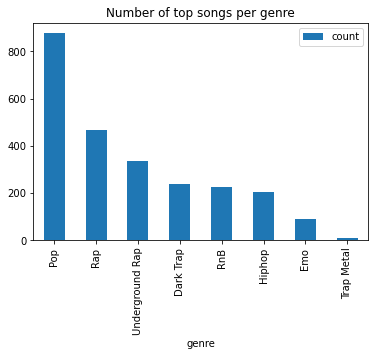

In [43]:
# Bar Plot
genre_count.plot.bar(x = 'genre', y = 'count', title = 'Number of top songs per genre')

In the above bar plot, we are able to see the number of top songs within each genre category for May 2020. Most of the songs fall within the Pop category, while there are much less in the Emo and Trap Metal categories.

Now, we can do the same with the June 2019 data. With `value_counts`, we will create a new object `genre_count2` containing the counts within each genre type. Then, we will convert the series into a data frame using `reset_index`.

In [44]:
genre_count2 = jdf['genre'].value_counts()
genre_count2 = genre_count2.reset_index()
genre_count2

index  genre
0              Pop  35526
1              Emo  28607
2  Underground Rap  28554
3        Dark Trap  28346
4              Rap  27510
5              RnB  23123
6           Hiphop  17001
7       Trap Metal   3924

Now that we have a new data frame with the genre counts, we will rename the column names.

In [45]:
# current columns as a list
genre_count2.columns.to_list()

# rename
genre_count2.columns = ['genre', 'count']
genre_count2

genre  count
0              Pop  35526
1              Emo  28607
2  Underground Rap  28554
3        Dark Trap  28346
4              Rap  27510
5              RnB  23123
6           Hiphop  17001
7       Trap Metal   3924

Through the above code, we have successfully renamed the column names to 'genre' and 'count' for better understanding.

With this data frame, we can create a bar plot.

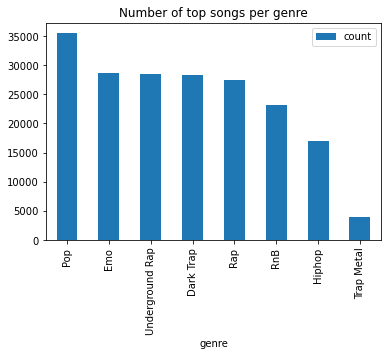

In [46]:
# Bar Plot
genre_count2.plot.bar(x = 'genre', y = 'count', title = 'Number of top songs per genre')

In the above bar plot, we are able to see the number of top songs within each genre category for June 2019. Like the May data, most of the songs fall within the Pop category. However, the Emo category has the second most songs, unlike the May data, where it had the second to least. Trap Metal remains as the genre with the least song count.

### Song Characteristics
Next, we want to explore the song characteristic levels given in the Spotify data sets. For this notebook, we will be looking specifically at the characteristic 'acousticness'. With a simple `plot.hist` command, we can produce a simple histogram showing the distribution of songs across the acousticness scale. We will do this for both the May and June data.

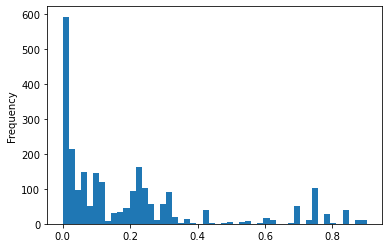

In [47]:
mdf['acousticness'].plot.hist(bins=50)

The above output is the frequency histogram for acousticness in May 2020 Top Spotify songs.

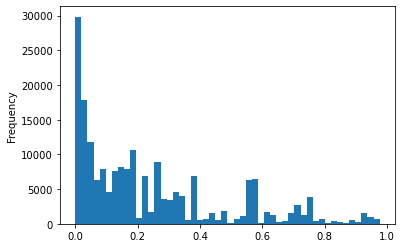

In [48]:
jdf['acousticness'].plot.hist(bins=50)

The above output is the frequency histogram for acousticness in June 2019 Top Spotify songs.

Although these charts are helpful, we can create a more informational chart with some more work. First, we create a new object `mdf_grouped` using the `groupby` command. 

In [49]:
mdf_grouped=mdf.groupby(['Continent','acousticness']).count()[['FID']]
mdf_grouped.head()

FID
Continent acousticness     
Africa    0.00006         1
          0.00147         1
          0.00153         1
          0.00255         1
          0.00285         1

`mdf_grouped` contains acousticness levels grouped by Continent. `FID` is a unique identifyer column. The output is a multi-level, multi-index dataframe. The `FID` column represents the count for each each song within a certain level of acousticness.

Now, using `reset_index`, we flatten the data frame and save it to a new object `mdf_flat`.

In [50]:
mdf_flat = mdf_grouped.reset_index()
mdf_flat

Continent  acousticness  FID
0           Africa       0.00006    1
1           Africa       0.00147    1
2           Africa       0.00153    1
3           Africa       0.00255    1
4           Africa       0.00285    1
..             ...           ...  ...
407  South America       0.32000    1
408  South America       0.32100    2
409  South America       0.43100   16
410  South America       0.53000    2
411  South America       0.68800    8

[412 rows x 3 columns]

Next, we can rename the columns.

In [51]:
mdf_flat = mdf_flat.rename(columns={'FID':'count'})
mdf_flat.head()

Continent  acousticness  count
0    Africa       0.00006      1
1    Africa       0.00147      1
2    Africa       0.00153      1
3    Africa       0.00255      1
4    Africa       0.00285      1

The `FID` column has now been renamed to `count` for easier understanding.

Now let's do the same for the June data set. The June data does not contain and 'Continent' column, so instead, we will group by 'Country'.

In [52]:
jdf_grouped=jdf.groupby(['Country','acousticness']).count()[['FID']]
jdf_grouped.head()

FID
Country   acousticness     
Argentina 0.000810       22
          0.000932       29
          0.001310       30
          0.001490       11
          0.001700       11

`jdf_grouped` contains acousticness levels grouped by Cuntry. `FID` is a unique identifyer column. The output is a multi-level, multi-index dataframe. The `FID` column represents the count for each each song within a certain level of acousticness.

Now, using `reset_index`, we flatten the data frame and save it to a new object `jdf_flat`.

In [53]:
jdf_flat = jdf_grouped.reset_index()
jdf_flat

Country  acousticness  FID
0     Argentina      0.000810   22
1     Argentina      0.000932   29
2     Argentina      0.001310   30
3     Argentina      0.001490   11
4     Argentina      0.001700   11
...         ...           ...  ...
6638    Uruguay      0.581000   54
6639    Uruguay      0.607000   78
6640    Uruguay      0.754000   27
6641    Uruguay      0.784000   27
6642    Uruguay      0.904000    9

[6643 rows x 3 columns]

Next,we can rename the columns.

In [59]:
jdf_flat = jdf_flat.rename(columns={'FID':'count'})

The `FID` column has now been renamed to `count` for easier understanding.

With `mdf_flat` and `jdf_flat`, we can create more informative stacked histograms using `plotly` library.

In [55]:
px.histogram(mdf_flat,
       x='acousticness',
       y='count',
       color='Continent',
       title='Frequency of Acousticness levels in Top Songs by Continent')

The above stacked histogam shows how many May 2020 top songs are in each acousticness level, color coded by Continent. From the chart, we are able to see how a majority of top songs contain a low level of acousticness. With the color codes, we can see that a majority of the data is from Europe.

In [60]:
px.histogram(jdf_flat,
       x='acousticness',
       y='count',
       color='Country',      
       title='Frequency of Acousticness levels in Top Songs by Country')

The above stacked histogam shows how many June 2019 top songs are in each acousticness level, color coded by Country. From the chart, we are able to see how a majority of top songs contain a low level of acousticness, similarly to the May data.

## Maps

### GDP Maps

With the `gdf` data frame and the `plot` command, we can create a map plot that color codes Countries by their GDP value.

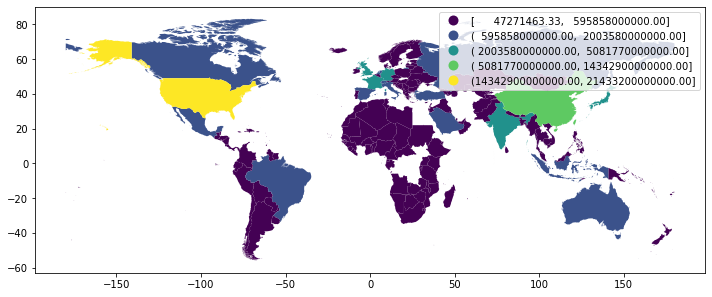

In [24]:
gdf.plot(figsize=(12,10),
                 column='GDP',
                 legend=True, 
                 scheme='NaturalBreaks')

Although the above map is helpful, we can use plotly to create an interactive Bubble World map, using the `scatter_geo` command.

In [27]:
fig = px.scatter_geo(gdf, locations="Country Code", color="GDP",
                     hover_name="COUNTRYAFF", size="GDP",
                     projection="natural earth", title='GDP per Country')
fig.show()

The result is a clean and colorful interactive map. The size of the circles, as well as the color, is indicative of each country's GDP value.

### Song Characteristics by Country

Using `matplotlib` library, I can create subplots of maps showing song characteristic levels by Country. First, I am mapping 'danceability' and 'energy' levels globally, broken down by quantiles. 

Text(0.5, 1.0, 'Energy of Top Songs by Country')

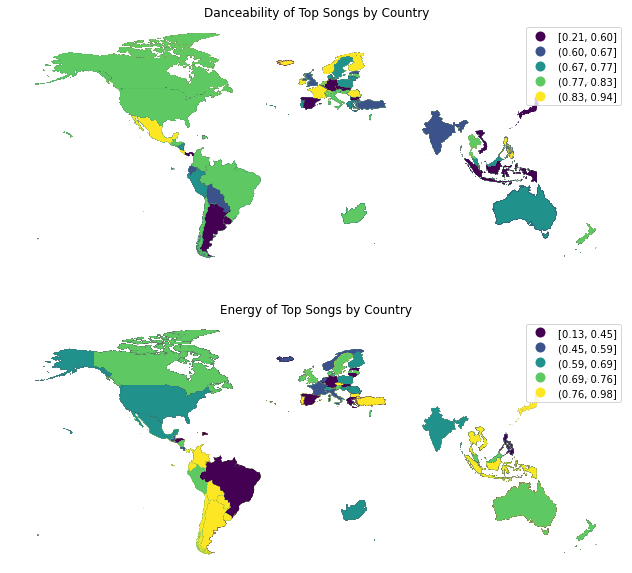

In [10]:
# create the 2x1 subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# name each subplot
ax1, ax2 = axs

# danceability
mdf.plot(column='danceability',
            legend=True, 
            scheme='quantiles',
            ax=ax1)

ax1.axis("off")
ax1.set_title("Danceability of Top Songs by Country")

# energy
mdf.plot(column='energy',
            legend=True, 
            scheme='quantiles', 
            ax=ax2)

ax2.axis("off")
ax2.set_title("Energy of Top Songs by Country")

More affluent countries in the West, specifically in North America and Europe, seem to favor songs with high dancebility. North American countries also seem to prefer mid-energy songs. On the other hand, countries in South America and Asia seem to favor lower to mid danceability. These countries also seem to prefer high energy songs. 

Next, loudness and speechiness.

Text(0.5, 1.0, 'Speechiness of Top Songs by Country')

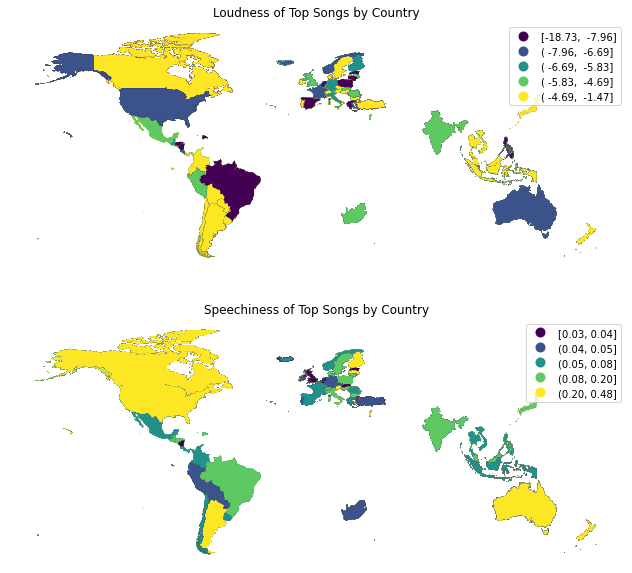

In [10]:
# create the 2x1 subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# name each subplot
ax1, ax2 = axs

# loudness
mdf.plot(column='loudness',
            legend=True, 
            scheme='quantiles',
            ax=ax1)

ax1.axis("off")
ax1.set_title("Loudness of Top Songs by Country")

# speechiness
mdf.plot(column='speechiness',
            legend=True, 
            scheme='quantiles', 
            ax=ax2)

ax2.axis("off")
ax2.set_title("Speechiness of Top Songs by Country")

There doesn't seem to be any correlation between affluence and loudness of top songs. However, countries in Asia seem to prefer loud music, while other continents have a variety of preference. North American countries and Australia prefer songs with mid speechiness, which could potentially be a result of the popularity of rap music. Countries in South America, Europe, and Asia seem to prefer low-level speechiness.

Next, acousticness and instrumentalness.

/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.8/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Text(0.5, 1.0, 'Instrumentalness of Top Songs by Country')

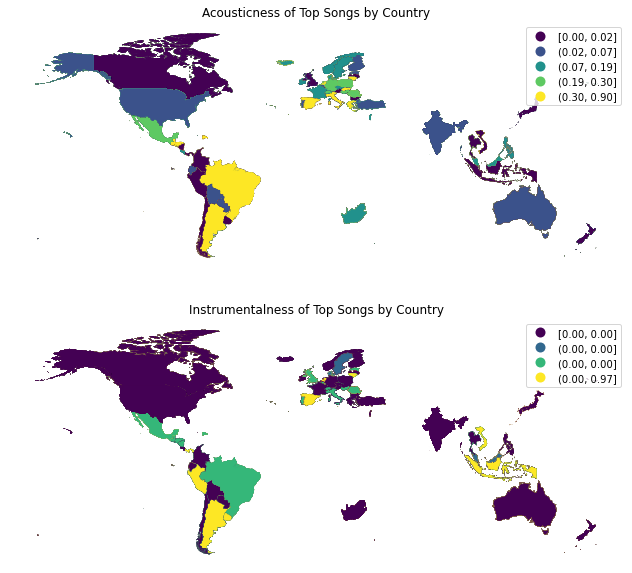

In [10]:
# create the 2x1 subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# name each subplot
ax1, ax2 = axs

# acousticness
mdf.plot(column='acousticness',
            legend=True, 
            scheme='quantiles',
            ax=ax1)

ax1.axis("off")
ax1.set_title("Acousticness of Top Songs by Country")

# instrumentalness
mdf.plot(column='instrumentalness',
            legend=True, 
            scheme='quantiles', 
            ax=ax2)

ax2.axis("off")
ax2.set_title("Instrumentalness of Top Songs by Country")

Countries in North America, Asia, Australia, and parts of Europe seem to prefer low to mid-level acousticness in their music, while a few countries in South America and Europe favor a high level. Although there seems to be variety in the instrumentalness map, all values are close to zero, indicating that globally, a low level of instrumentalness is preferred. Some countries in Asia and South America prefer some level of instrumentalness.

Lastly, liveness and valence. For context, valence describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (happy, cheerful, euphoric), while tracks with low valence sound more negative (sad, depressed, angry).

Text(0.5, 1.0, 'Valence of Top Songs by Country')

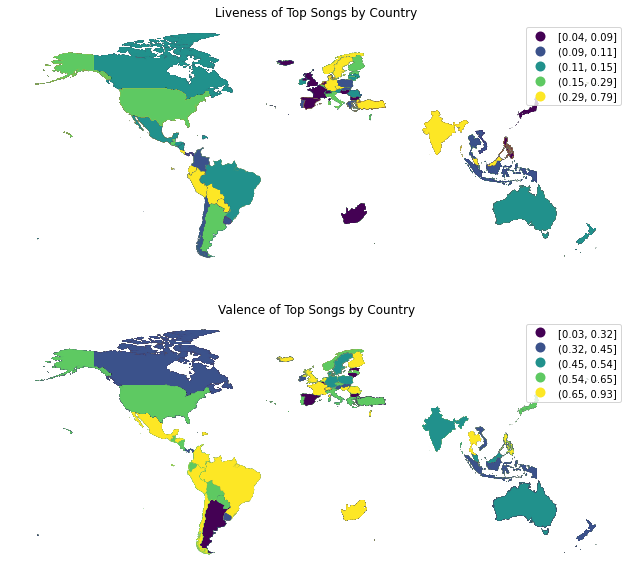

In [9]:
# create the 2x1 subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# name each subplot
ax1, ax2 = axs

# liveness
mdf.plot(column='liveness',
            legend=True, 
            scheme='quantiles',
            ax=ax1)

ax1.axis("off")
ax1.set_title("Liveness of Top Songs by Country")

# valence
mdf.plot(column='valence',
            legend=True, 
            scheme='quantiles', 
            ax=ax2)

ax2.axis("off")
ax2.set_title("Valence of Top Songs by Country")

A majority of countries globally enjoy a relatively low level of liveness. Only a few countries, such as India, prefer a mid level. Most countries globally also prefer a mid to high level of valence.

## Credits

Group Members: Pawan (Sine) Polcharoen and Claire Guo

Roles: In our group project, our titles are both Project Co-Leads. However, we have smaller roles assigned within the group. Specifically, Sine is in charge of creating charts from the datasets. She predominantly conducted data exploration with both the May 2020 data set and GDP data set. For this midterm, she put together the JupyterHub notebook, helped to brainstorm the Project Proposal, and helped with the creation of the presentation. Claire is primarily in charge of visualizing the data spatially through using maps. She mostly worked with the June 2019 data set. In regard to the midterm, she helped with brainstorming for the JupyterHub notebook, wrote the Project Proposal, and helped with the creation of the presentation. Both of us plan on splitting up work evenly on future write-ups, research, and searches for additional datasets to gain a deeper understanding of how different global factors affect music preferences. 